<img src='images/logochair_hr.png' width='300'>  

# Overview: Analyzing Data with Python

<img src='images/wordcloud.png' width='700'>  
**Robert Biele**  
robert.biele1@tu-dresden.de

- using Python since 2007 (computational physics course at the TU Dresden)

**General remarks**
- everybody has registered with Microsoft Azure Notebook?
- please do switch on the camera
- Zoom: would like to show slides and you to work simultaneously (split screen?)
- ask whenever you have questions or when you got lost!

**You will learn**
1. Python basics, understand the language and ways to find solutions
2. Create / import **data** and structure it
3. Analyze and Visualize data
4. Gain understanding and use this to **tell a story**

## Motivation: Understanding Data, Finding Patterns and Structure

Data can come from everywhere:
- Web browsing
- experimental data, results from calculations
- questionnaire
- GPS data
- Netflix,...

#### Example: Can we learn something from our little questionnaire? Patterns?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 90.

# df = pd.read_csv('data/question_2.csv')
# df['Your Name?'] = '**'
# df['Your Email?'] = '**'
# df.to_csv('data/question_ano.csv',index=False)
# ! rm -rf data/question_2.csv

df = pd.read_csv('data/question_ano.csv')

df_new = df.iloc[:,[3,5,6,7,8,9,10,11,12,13,14,-1]]
new_columns = ['Python','Basics','Numerics','Jupyter','analyzing', 'visualisation',
    'Machine Learning','Databases','Stocks','location data','material science','hours']
df_new.columns=new_columns
df_new.head(7)

,Python,Basics,Numerics,Jupyter,analyzing,visualisation,Machine Learning,Databases,Stocks,location data,material science,hours
0,Not at all,very interested,interested,interested,very interested,very interested,interested,interested,interested,interested,interested,2 or 3 hours per week
1,Some basic Python,not interested,interested,interested,very interested,very interested,very interested,what is it?,not interested,not interested,very interested,3+
2,Some basic Python,interested,very interested,what is it?,very interested,very interested,very interested,interested,not interested,interested,not interested,2 or 3 hours per week
3,Not at all,very interested,very interested,very interested,very interested,very interested,very interested,very interested,very interested,very interested,very interested,Not more than 2
4,Not at all,interested,interested,interested,very interested,very interested,very interested,very interested,interested,interested,very interested,3+
5,Some basic Python,interested,very interested,interested,interested,interested,interested,what is it?,very interested,interested,very interested,2 or 3 hours per week
6,Some basic Python,interested,interested,not interested,interested,interested,interested,interested,interested,interested,interested,3+


**Change the strings to numerical data.**

In [2]:
df_new = df_new.replace(['Not at all','Some basic Python'],[0,1])
df_new = df_new.replace(['very interested','interested','not interested','what is it?'],[2,1,0,1])
df_new = df_new.replace(['3+','2 or 3 hours per week','Not more than 2'],[3,2,1])
df_new.head(7)

,Python,Basics,Numerics,Jupyter,analyzing,visualisation,Machine Learning,Databases,Stocks,location data,material science,hours
0,0,2,1,1,2,2,1,1,1,1,1,2
1,1,0,1,1,2,2,2,1,0,0,2,3
2,1,1,2,1,2,2,2,1,0,1,0,2
3,0,2,2,2,2,2,2,2,2,2,2,1
4,0,1,1,1,2,2,2,2,1,1,2,3
5,1,1,2,1,1,1,1,1,2,1,2,2
6,1,1,1,0,1,1,1,1,1,1,1,3


**Is there some structure in the data? Clusters?**

**Normalize the data and apply a machine learning clustering algorithm to the data:**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(df_new.iloc[:,1:].values)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Are there any Clusters, Groups in the data?
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(X)

df_new["Labels"] = k_means.labels_

df_new.groupby('Labels').mean().sort_values('Python')

,Python,Basics,Numerics,Jupyter,analyzing,visualisation,Machine Learning,Databases,Stocks,location data,material science,hours
Labels,,,,,,,,,,,,
0,0.0,2.0,2.00,2.0,2.0,2.0,2.00,2.00,2.0,2.00,2.00,1.0
1,0.5,1.0,1.25,1.0,2.0,2.0,1.75,1.25,0.5,0.75,1.25,2.5
2,1.0,1.0,1.50,0.5,1.0,1.0,1.00,1.00,1.5,1.00,1.50,2.5


- might be easy to analyze a group of 7. But what if you have a lecture of 200+ people?

#### Word Cloud and Visualization

In [6]:
# ! pip install wordcloud
from wordcloud import WordCloud

cloud = df_new.drop('hours', 1)
alice_wc = WordCloud(collocations=False,
                     background_color='white').generate_from_frequencies(
                         cloud.transpose()[:].sum(axis=1))

     |████████████████████████████████| 358kB 3.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


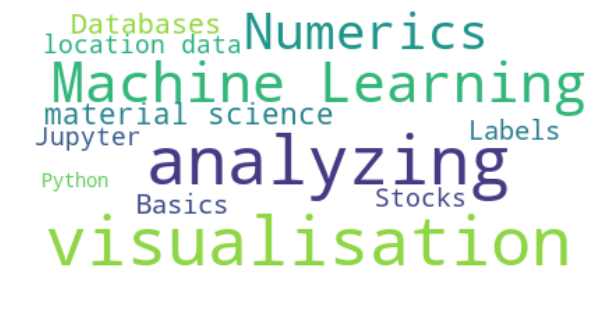

In [7]:
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(14) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off');

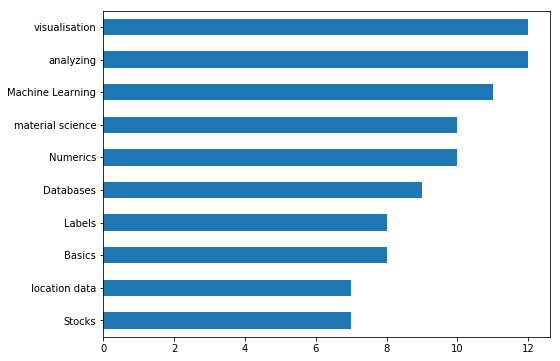

In [8]:
cloud.transpose()[1:].sum(axis=1).sort_values()[1:].plot(kind='barh',figsize=(8,6));

#### Data-driven Discovery of 3D and 2D Thermoelectric Materials

- 36.000 3D and 900 2D materials currently in the publicly available <a href='https://www.ctcms.nist.gov/~knc6/JVASP.html'>JARVIS-DFT database </a>
- use this to find structure and patterns, for example in **Thermoelectric materials** (<a href='https://arxiv.org/pdf/1906.06024.pdf'>arXiv</a>)  
  
    
**Figure of Merit**:     $\quad\quad zT=\frac{S^2\sigma}{\kappa}T$

<img src='images/ms_1.png' width='800'>  

<img src='images/ms_2.png' width='400'>

<img src='images/pse_te.png' width='600'>

- Use this Dataset to train Machine learning algorithms and predict novel materials  
**Data Science is changing the way physicists and scientist are working nowadays. And in my opinion this influence will increase in the future!!**

### Visualization

In [9]:
url = 'https://raw.githubusercontent.com/rbiele02/data/master/Topic_Survey_Assignment.csv'
df = pd.read_csv(url)
participants = 2233
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


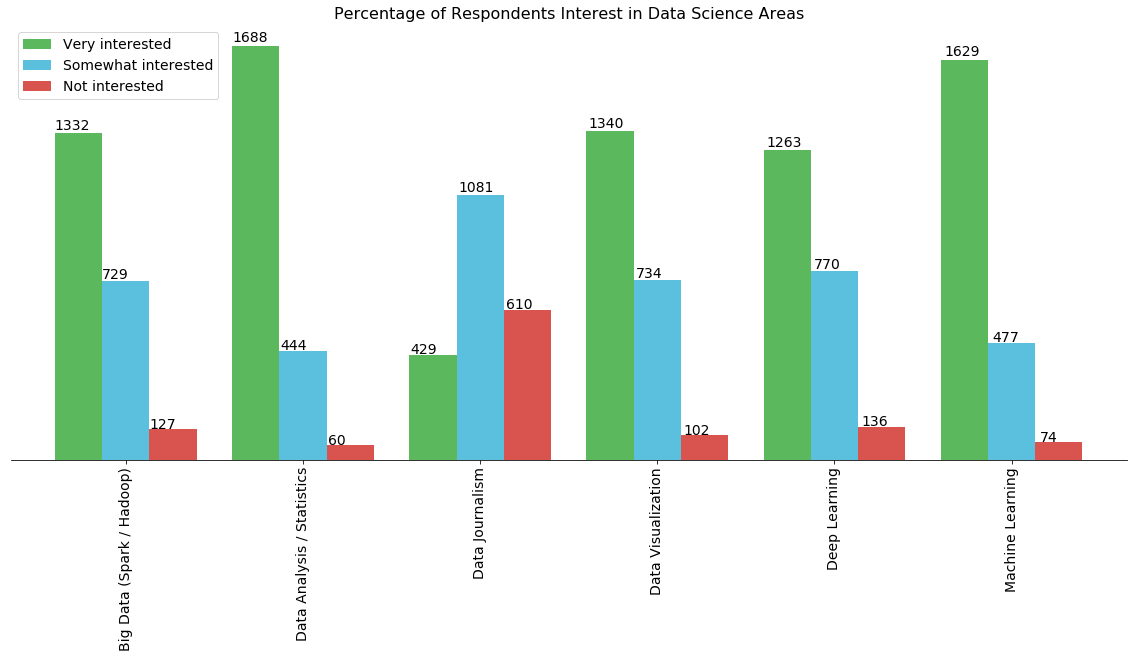

In [10]:
ax = df.plot(kind='bar',figsize=(20,8),width=0.8,color= ['#5cb85c','#5bc0de','#d9534f'])
plt.xticks(fontsize=14)
ax.set_title('Percentage of Respondents Interest in Data Science Areas', fontsize=16)
ax.legend(fontsize=14)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01),fontsize=14)
ax.set_frame_on(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([]);

## Content of the Course

**Prerequisites and Skills**  
<img src="images/skills.png" width="550">

**Time Frame**  
<img src="images/time.png" width="550">

---
1. **Jupyter Notebook and Labs**
2. **Basic Python**
3. Python Libraries: NumPy, Matplotlib, Pandas
4. Analysing Data with Python
5. Data Visualization and interactive Animations
6. Machine Learning
7.  Data Science in Material Science
8. Stock Market and Web scraping with Python
---

Whenever you have an topic of interest please let me know! And ...
- as you can do almost everything in Python, I wont teach you everything, but...